<ipython-input-27-48eb8e757cda>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfNew[column].replace({'Yes': 1, 'No': 0}, inplace = True)
<ipython-input-27-48eb8e757cda>:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfNew[column].replace({'Yes': 1, 'No': 0}, inplace = True)
<ipython-input-27-

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5642 - loss: 0.6893 - val_accuracy: 0.7609 - val_loss: 0.4670
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7583 - loss: 0.4798 - val_accuracy: 0.7911 - val_loss: 0.4246
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7810 - loss: 0.4587 - val_accuracy: 0.7893 - val_loss: 0.4138
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7708 - loss: 0.4678 - val_accuracy: 0.7929 - val_loss: 0.4127
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: 0.4341 - val_accuracy: 0.7991 - val_loss: 0.4076
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7896 - loss: 0.4464 - val_accuracy: 0.8027 - val_loss: 0.4051
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7936 - loss: 0.4339 - val_accuracy: 0.7991 - val_loss: 0.4030
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8007 - loss: 0.4282 - val_acc

Text(95.72222222222221, 0.5, 'Truth')

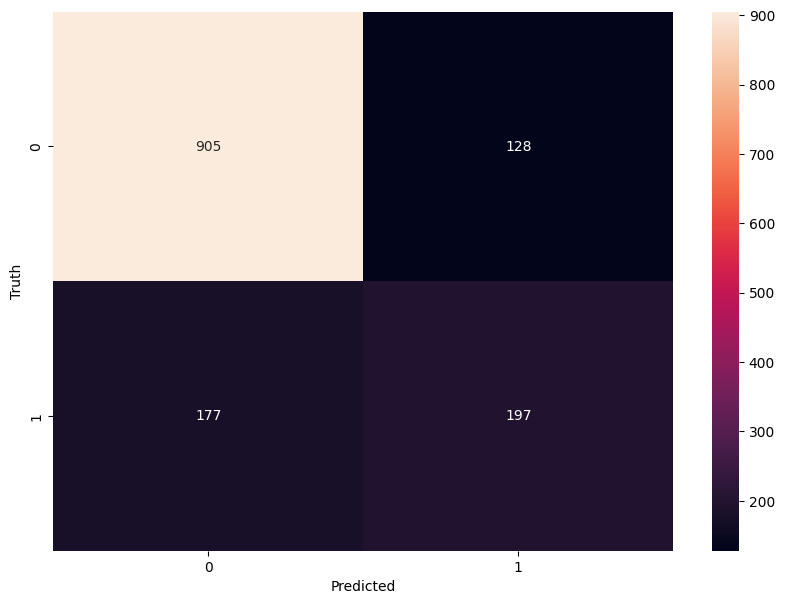

In [27]:
from re import L
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/data.csv')
df.drop('customerID', axis=1, inplace=True)

dfNew = df[df['TotalCharges'] != ' '].copy()
dfNew['TotalCharges'] = pd.to_numeric(dfNew['TotalCharges'])
dfNew.dtypes

# Visualisation(Tenure)
churnNo =  dfNew[dfNew.Churn == 'No'].tenure
churnYes = dfNew[dfNew.Churn == 'Yes'].tenure

# plt.hist([churnNo, churnYes], color = ['red', 'green'], label = ['No', 'Yes'])
# plt.xlabel('Tenure')
# plt.ylabel('Count')
# plt.legend()

def knowColumn(df):
  for column in dfNew:
    if dfNew[column].dtype == object:
        print(f'{column}: {dfNew[column].unique()}')
dfNew.replace('No internet service', 'No', inplace = True)
dfNew.replace('No phone service', 'No', inplace = True)

# knowColumn(dfNew)

categoricalColumns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for column in categoricalColumns:
  dfNew[column].replace({'Yes': 1, 'No': 0}, inplace = True)


dfNew['gender'].replace({'Female' : 1, 'Male' : 0}, inplace = True)
df2 = pd.get_dummies(data = dfNew, columns = ['InternetService', 'Contract', 'PaymentMethod'], dtype = int)
df2.sample(4)


# Scaling
from sklearn.preprocessing import MinMaxScaler
columns_for_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df2[columns_for_scaling] = scaler.fit_transform(df2[columns_for_scaling])
df2.sample(4)

x = df2.drop('Churn', axis = 1)
y = df2['Churn']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

import tensorflow as tf
from tensorflow import keras
# Columns --> 26
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(x_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop])

model.evaluate(x_test, y_test)

yPredicted = model.predict(x_test)
yPred = []
for i in yPredicted:
  if i > 0.5:
    yPred.append(1)
  else:
    yPred.append(0)

# print(y_test[:10])
# print(yPred[:10])

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, yPred))

import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=yPred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
